# Tareas

Colaboración con Dara Meneses, Sebastián Ibarra, Ines Coppola 

In [2]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets
import pandas as pd
import numpy as np


Populating the interactive namespace from numpy and matplotlib


In [3]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    
    

In [4]:
def plotModelo1(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('chirps por segundo')
    ax[0].set_ylabel('temperatura')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [5]:
def plotModelo2(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

<div class="alert alert-warning">
Fecha límite de entrega: 29 de Septiembre, 2021 23:59
</div>

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [6]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)

use "xa" y ya porque "ya" había usando las variables x en ejercicios abajo y no quería q hubiera confusiones:)


In [7]:
from sympy import Symbol
import sympy as sym
from sympy import Sum, Indexed
xa,ya,m,i,beta0,beta1 = sym.symbols('xa,ya,m,i,beta0,beta1')
from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=True)



Primero pasamos la suma de "Ajuste de curvas" a Sympy

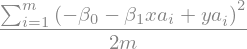

In [8]:
summ= 1/(2*m)*Sum((Indexed(ya,i)-beta0-beta1*Indexed(xa,i))**2,(i,1,m))
summ

Sacamos la derivada parcial de beta 1 con la función de diff

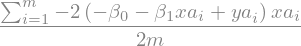

In [9]:
derivada= diff(summ,beta1)
derivada

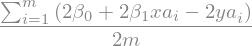

In [10]:
derivadacero= diff(summ,beta0)
derivadacero

## Problema 2 YA CON LA CORRECIÓN

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [11]:
edad= np.loadtxt("edad.dat")
altura=np.loadtxt("altura.dat")

Como siempre, primero es mejor graficar para tener una idea visual de los datos a trabajar

Text(0, 0.5, 'altura')

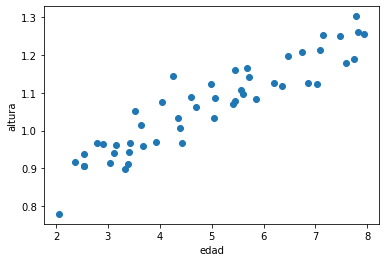

In [12]:
plt.scatter(edad,altura, label="datox")
plt.xlabel('edad')
plt.ylabel('altura')

Para graficar usamos la suma previamente vista en problema 1 y hacemos una función

In [19]:
def graf(bet0,bet1,X=edad, Y=altura):
    todo=0
    l=len(Y)
    for i in range(l):
        todo= todo+(altura[i]-bet0-bet1*edad[i])**2/(2*50)
    return todo

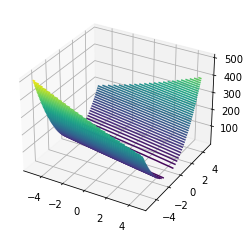

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
bet0 = np.arange(-5, 5, 0.25)
bet1 = np.arange(-5, 5, 0.25)
BET0, BET1 = np.meshgrid(bet0, bet1)
Z = graf(BET0,BET1)
ax.contour3D(BET0,BET1,Z,50)
plt.show()



Ahora sacamos la gráfica de contorno

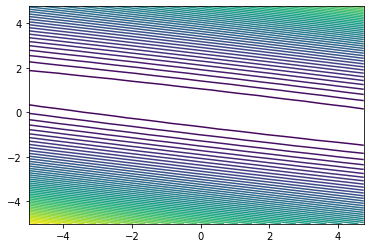

In [27]:
plt.contour(BET0,BET1,Z,50)
plt.show()

b)ahora para indicar el valor de J en la ultima iteración



In [29]:
r=RegresionLineal()
r.gradientDescent(edad,altura)

La función convergió con beta: [0.57873101 0.095071  ] en la iteración 455


<function matplotlib.pyplot.show(close=None, block=None)>

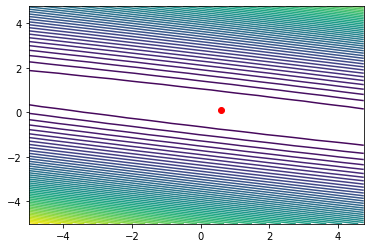

In [38]:
plt.contour(BET0, BET1, Z, 50)
plt.plot(r.beta[0],r.beta[1],"ro")
plt.show

c) Modifique el widget para mostrar conforme pasan las iteraciones como el valor de  𝐉(𝛽)  se acerca al mínimo en la gráfica de contorno

In [47]:
from ipywidgets import interact, fixed, widgets, IntSlider, FloatSlider, interact_manual

In [50]:
def iterando(i):
    plt.contour(BET0, BET1, Z, 100)
    plt.plot(r.beta[0],r.beta[1], "go")
    plt.plot(r.historia["beta"][i][0], r.historia["beta"][i][1],"ro")
    plt.show

interactive(children=(IntSlider(value=0, description='i', max=454), Output()), _dom_classes=('widget-interact'…

<function __main__.iterando(i)>

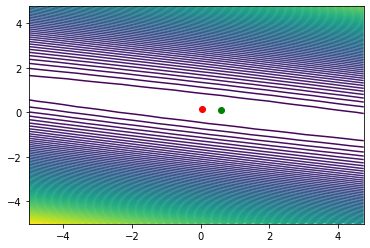

In [52]:
interact(iterando, i=IntSlider(min=0, max=454, step=1, value=0))

d) Agrega al widget un control para modificar  𝛼 

In [54]:
def step_size(alpha=0.03):
    r=RegresionLineal(alpha)
    r.gradientDescent(edad,altura)
    return r.beta

In [56]:
interact_manual(step_size,
               alpha=FloatSlider(value=0.0001,
                                min=0.0001,
                                max=0.1,
                                step=0.00001))

interactive(children=(FloatSlider(value=0.0001, description='alpha', max=0.1, min=0.0001, step=1e-05), Button(…

<function __main__.step_size(alpha=0.03)>

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [92]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


In [93]:
chirps= np.loadtxt("chirps.txt")
a=[]
b=[]
for i in chirps:
    a.append(i[0])
    b.append(i[1])
A=np.array(a)
B=np.array(b)

antes de generar el modelo de regresión hay que graficarlo para tener una idea visual de su relación

Text(0, 0.5, 'Temperatura')

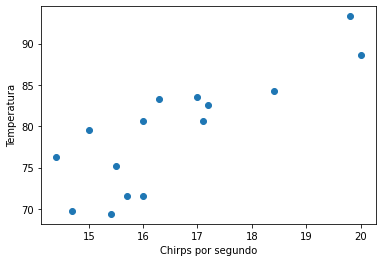

In [94]:
plt.scatter(A,B, label="chirps")
plt.xlabel('Chirps por segundo')
plt.ylabel('Temperatura')

In [147]:
r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(A, B)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


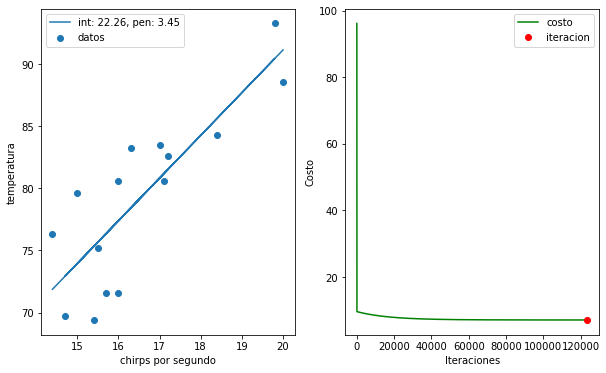

In [139]:
plotModelo1(A,B,r,123658)

Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

En la regresión lineal creada encontramos una pendiente positiva de 3.45 y se intersecciona en el eje y en 22.26, en la página web la pendiente es de 3.41 y la intersección con y de 22.85, por lo cual los datos no son identicos pero coinciden lo suficiente. Con un rango de error de centesimas. En general, entre más sube la temperatura más hacenn "chirp" los grillos pero solo entre cierto rango de temperatura. Para llegar al alpha "correcto", el learning rate fue modificado de 0.03 a 0.003, esto porque el 0.03 era demasiado grande y estaba ocasionando cambios muy rápidos para este modelo.También para que los datos fueran más precisos se modificó el número máximo de iteraciones, ya que este controla cuántos pasos va a tomar antes de parar. 


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

Primero convertimos manualmente los datos del cuarteto de Anscombe a arrays para poder graficarlos 

In [104]:
X1=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y1=np.array([8.04,6.95,7.58,8.81,8.33,9.96,7.24,4.26,10.84,4.82,5.68])
X2=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y2=np.array([9.14,8.14,8.74,8.77,9.26,8.1,6.13,3.1,9.13,7.26,4.74])
X3=np.array([10,8,13,9,11,14,6,4,12,7,5])
Y3=np.array([7.46,6.77,12.74,7.11,7.81,8.84,6.08,5.39,8.15,6.42,5.73])
X4=np.array([8,8,8,8,8,8,8,19,8,8,8])
Y4=np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])

Para los datos 1 gráfica 1

Text(0, 0.5, 'x2')

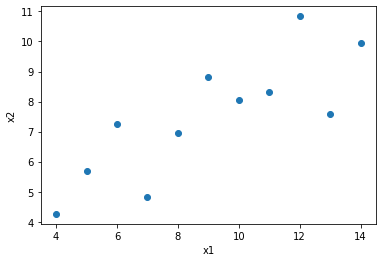

In [107]:
plt.scatter(X1,Y1, label="grafica 1")
plt.xlabel('x1')
plt.ylabel('x2')

Para los datos 2 gráfica 2

Text(0, 0.5, 'x2')

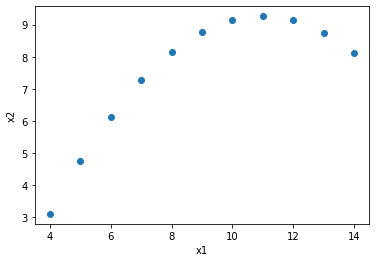

In [108]:
plt.scatter(X2,Y2, label="grafica 2")
plt.xlabel('x1')
plt.ylabel('x2')

Para los datos 3 grafica 3

Text(0, 0.5, 'x2')

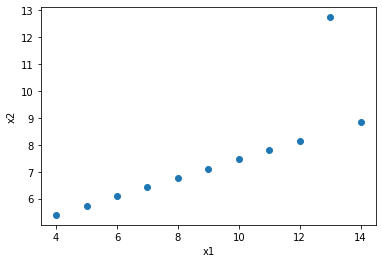

In [110]:
plt.scatter(X3,Y3, label="grafica 3")
plt.xlabel('x1')
plt.ylabel('x2')

Para los datos 4 gráfica 4

Text(0, 0.5, 'x2')

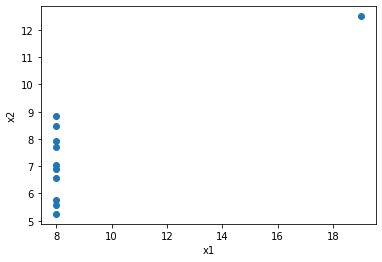

In [111]:
plt.scatter(X4,Y4, label="grafica 4")
plt.xlabel('x1')
plt.ylabel('x2')

Después de gráficar los 4 sets de datos, vemos que son muy distintos visualmente, ahora vamos a sacar la regresión lineal de cada uno

La regreseión lineal de los datos 1 es:

In [128]:
rxy1= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rxy1.gradientDescent(X1, Y1)

La función convergió con beta: [2.94731748 0.50531651] en la iteración 12292


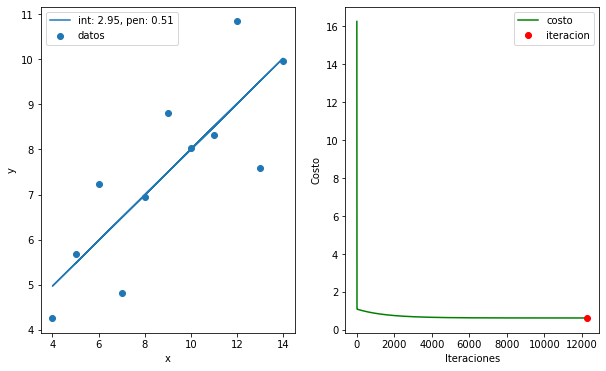

In [140]:
plotModelo2(X1,Y1,rxy1,12291)

la regresión lineal de los datos 2 es:

In [130]:
rxy2= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rxy2.gradientDescent(X2, Y2)

La función convergió con beta: [2.9481381  0.50522536] en la iteración 12293


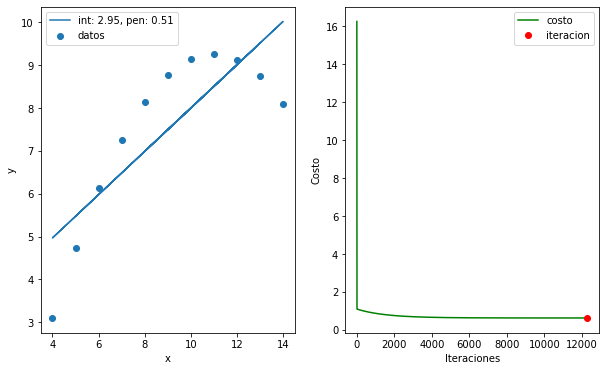

In [141]:
plotModelo2(X2,Y2,rxy2,12292)

La regresión lineal de los datos 3 es:

In [131]:
rxy3= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rxy3.gradientDescent(X3, Y3)

La función convergió con beta: [2.94967268 0.50495371] en la iteración 12294


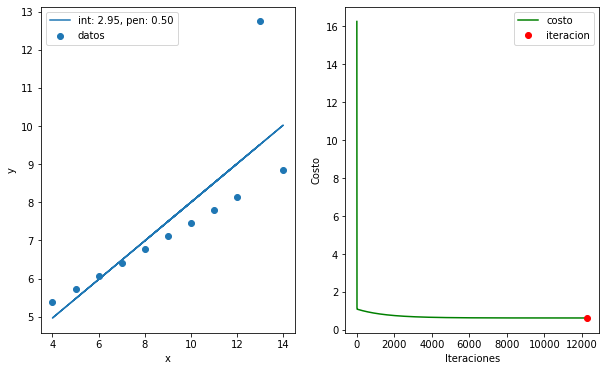

In [142]:
plotModelo2(X3,Y3,rxy3,12293)

La regresión lineal de los datos 4 es:

In [133]:
rxy4= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rxy4.gradientDescent(X4, Y4)

La función convergió con beta: [2.94895873 0.50513421] en la iteración 12294


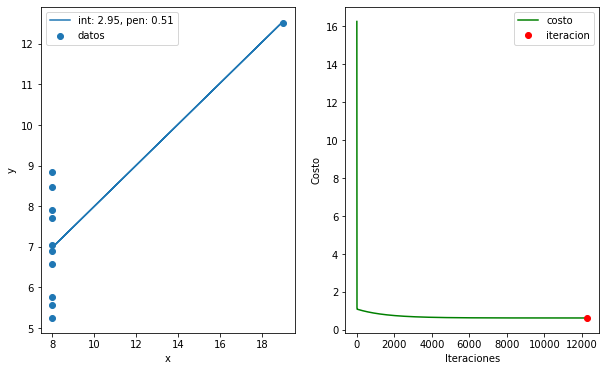

In [143]:
plotModelo2(X4,Y4,rxy4,12293)

Después de graficar los datos de los 4 sets y también sacar la regresión lineal de esos mismo 4, podmeos notar que aunque las primeras graficas son completamente diferentes, al final la regresión lineal de las 4 es la misma. Debido esto, vemos al importancia de gráficar los datos antes de sacar la regresión lineal, ya que solo viendo lo obtenido en las regresiones podríamos pensar que son casi identicas. También observamos que, por ejemplo, en la gráfica 4 sólo existe un dato que se encuentra fuera del "rango" de los otros y cómo este cambia por completo la regresión, por ello es tan importante tener en cuenta que un "punto aislado" puede crear un cambio muy notorio.

## Problema 5

Use el archivo `radioactive_decay.dat`

In [159]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [164]:
radioactive= np.loadtxt("radioactive_decay.txt")
tim=[]
rad=[]
for i in radioactive:
    tim.append(i[0])
    rad.append(i[1])
TIM=np.array(tim)
RAD=np.array(rad)

Text(0, 0.5, 'radioactividad')

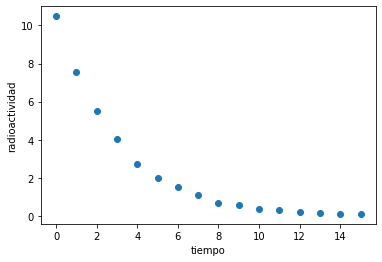

In [170]:
plt.scatter(TIM,RAD, label="desintegración radioactiva")
plt.xlabel('tiempo')
plt.ylabel('radioactividad')

Observamos que los puntos forman una gráfica decreciente, ya que con el paso del tiempo (eje x) la radioactividad (eje y) disminuye. Es comparable a la gráfica de e^-x, pero está "recorrida" e inicia en cero, ya que no hay tiempo negativo.  

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

dado que nuestra gráfica tiene un comportamiento exponencial, para linealizar buscamos la funcion inversa, la cual sabemos que es el logaritmno natural. Así aplicamos el logaritmo natural a rad.

In [175]:
logRAD=[]
for i in RAD: 
    logRAD.append(np.log(i))
LOGRAD=np.array(logRAD)

array([ 2.34946868,  2.02022218,  1.70292826,  1.3912819 ,  1.00795792,
        0.70309751,  0.40546511,  0.0861777 , -0.38566248, -0.56211892,
       -0.99425227, -1.17118298, -1.66073121, -1.89711998, -2.04022083,
       -2.20727491])

Text(0, 0.5, 'radioactividad')

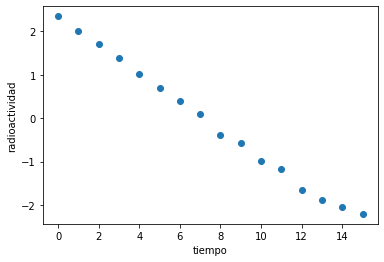

In [176]:
plt.scatter(TIM,LOGRAD,label="desintegración radioactiva lineal")
plt.xlabel('tiempo')
plt.ylabel('radioactividad')

Notamos que al aplicar logaritmo nuestra gráfica se "linealiza", es más fácil traza una linea q toque a los puntos. Ahora guardamos los puntos junto con los nuevos valores de y donde ya se aplico el logaritmo

In [189]:
LOGRADXY=[]
for i in range(len(TIM)):
    LOGRADXY.append((TIM[i], LOGRAD[i]))
    
LOGRADXYARRAY=np.array(LOGRADXY)
np.savetxt("transform_radioactive_decay.txt", LOGRADXYARRAY)

In [282]:
LOGRADXYARRAY

array([[ 0.        ,  2.34946868],
       [ 1.        ,  2.02022218],
       [ 2.        ,  1.70292826],
       [ 3.        ,  1.3912819 ],
       [ 4.        ,  1.00795792],
       [ 5.        ,  0.70309751],
       [ 6.        ,  0.40546511],
       [ 7.        ,  0.0861777 ],
       [ 8.        , -0.38566248],
       [ 9.        , -0.56211892],
       [10.        , -0.99425227],
       [11.        , -1.17118298],
       [12.        , -1.66073121],
       [13.        , -1.89711998],
       [14.        , -2.04022083],
       [15.        , -2.20727491]])

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [198]:
RADFIN= np.loadtxt("transform_radioactive_decay.txt")
f=[]
e=[]
for i in RADFIN:
    f.append(i[0])
    e.append(i[1])
F=np.array(f)
E=np.array(e)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

In [208]:
E

array([ 2.34946868,  2.02022218,  1.70292826,  1.3912819 ,  1.00795792,
        0.70309751,  0.40546511,  0.0861777 , -0.38566248, -0.56211892,
       -0.99425227, -1.17118298, -1.66073121, -1.89711998, -2.04022083,
       -2.20727491])

In [212]:
rpr= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rpr.gradientDescent(F, E)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


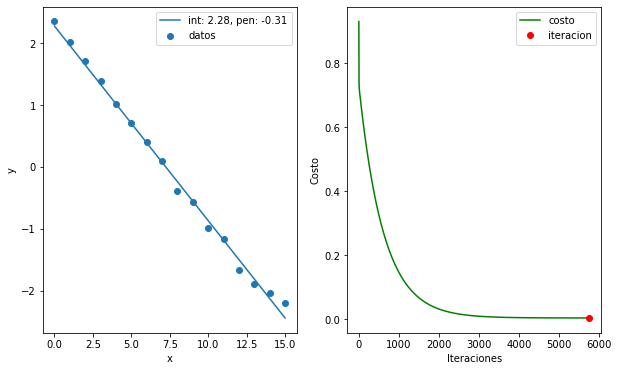

In [213]:
plotModelo2(F,E,rpr,5754)

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

Los valores que mejor se ajustan son 2.27548901 y -0.31459673 porque la función converge con beta en esos puntos. El espacio sin transformar sería la regresion lineal sin aplicar el logaritmo, así:


In [214]:
rpre= RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
rpre.gradientDescent(TIM, RAD)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


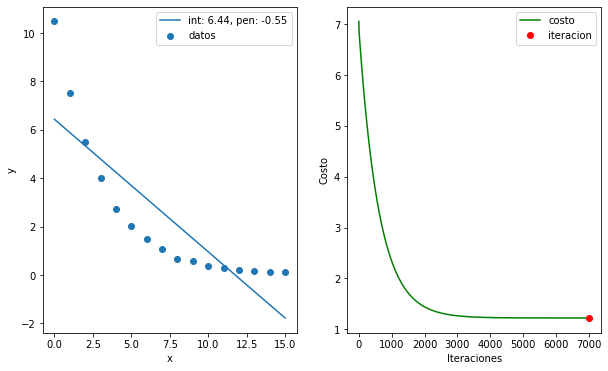

In [215]:
plotModelo2(TIM,RAD,rpre,7015)

Las betas que mejor se ajustan en el espacio son transformar son 6.43577297 y -0.54728535 dado que ahí es donde convergen. 
